In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [2]:
car_rides = pd.read_csv('data.csv')
car_rides = car_rides.drop(['Unnamed: 0'], axis = 1)
car_rides.head(3)

,price,distance,cab_type,destination,source,surge_multiplier,product_id,name,temp,clouds,rain,humidity,wind,day,hour
0,5.0,0.44,Lyft,North Station,Haymarket Square,1.0,lyft_line,Shared,38.46,0.29,0.0000,0.76,7.68,6,9
1,11.0,0.44,Lyft,North Station,Haymarket Square,1.0,lyft_premier,Lux,44.31,1.00,0.1123,0.90,13.69,1,2
2,11.0,0.44,Lyft,North Station,Haymarket Square,1.0,lyft_premier,Lux,43.82,0.99,0.0997,0.89,11.57,1,2


In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(car_rides['cab_type'])
car_rides['cab_type_le'] = le.transform(car_rides['cab_type']) 
le.fit(car_rides['destination'])
car_rides['destination_le'] = le.transform(car_rides['destination']) 
le.fit(car_rides['source'])
car_rides['source_le'] = le.transform(car_rides['source']) 
le.fit(car_rides['product_id'])
car_rides['product_id_le'] = le.transform(car_rides['product_id']) 
le.fit(car_rides['name'])
car_rides['name_le'] = le.transform(car_rides['name']) 
car_rides.head(3)

,price,distance,cab_type,destination,source,surge_multiplier,product_id,name,temp,clouds,rain,humidity,wind,day,hour,cab_type_le,destination_le,source_le,product_id_le,name_le
0,5.0,0.44,Lyft,North Station,Haymarket Square,1.0,lyft_line,Shared,38.46,0.29,0.0000,0.76,7.68,6,9,0,7,5,7,7
1,11.0,0.44,Lyft,North Station,Haymarket Square,1.0,lyft_premier,Lux,44.31,1.00,0.1123,0.90,13.69,1,2,0,7,5,11,2
2,11.0,0.44,Lyft,North Station,Haymarket Square,1.0,lyft_premier,Lux,43.82,0.99,0.0997,0.89,11.57,1,2,0,7,5,11,2


### Dropping highly correlated features

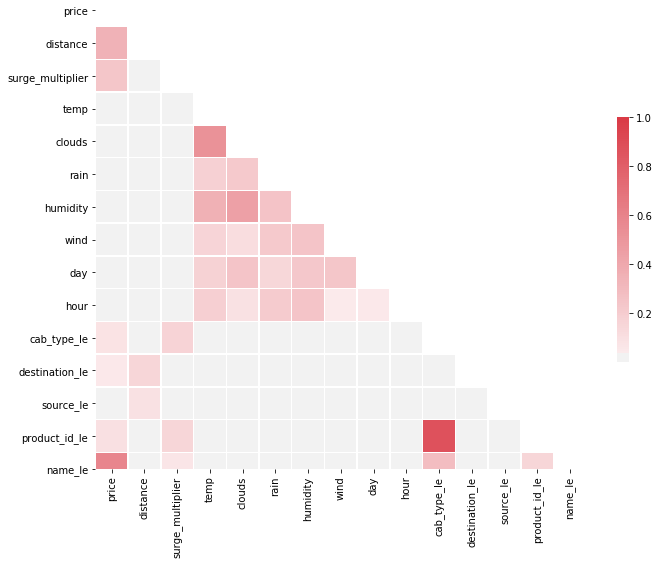

In [4]:
all_xy = car_rides.drop(['product_id', 'cab_type', 'destination', 'source', 'name'], axis = 1)
corr_matrix = all_xy.corr().abs()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Select the upper part of the triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [5]:
corr_matrix

,price,distance,surge_multiplier,temp,clouds,rain,humidity,wind,day,hour,cab_type_le,destination_le,source_le,product_id_le,name_le
price,1.000000,0.345648,0.240652,0.000818,0.001943,0.001108,0.001899,0.000390,0.001339,0.000494,0.081561,0.047247,0.027483,0.101144,0.586203
distance,0.345648,1.000000,0.025487,0.002300,0.000693,0.002469,0.003333,0.002056,0.003097,0.001346,0.002385,0.152135,0.090905,0.001464,0.001474
surge_multiplier,0.240652,0.025487,1.000000,0.001773,0.000564,0.005030,0.003105,0.000609,0.000329,0.000676,0.164448,0.001236,0.034417,0.156181,0.068790
temp,0.000818,0.002300,0.001773,1.000000,0.520569,0.185374,0.356719,0.156654,0.173013,0.191957,0.002100,0.001917,0.000295,0.002318,0.001950
clouds,0.001943,0.000693,0.000564,0.520569,1.000000,0.221853,0.441236,0.116650,0.244061,0.093700,0.000303,0.002915,0.000623,0.000016,0.001851
rain,0.001108,0.002469,0.005030,0.185374,0.221853,1.000000,0.256481,0.224417,0.144822,0.208121,0.003663,0.001674,0.001422,0.002865,0.000492
humidity,0.001899,0.003333,0.003105,0.356719,0.441236,0.256481,1.000000,0.242427,0.227731,0.246443,0.001468,0.001894,0.006564,0.001316,0.000271
wind,0.000390,0.002056,0.000609,0.156654,0.116650,0.224417,0.242427,1.000000,0.241942,0.043662,0.003937,0.005399,0.000882,0.003333,0.000068
day,0.001339,0.003097,0.000329,0.173013,0.244061,0.144822,0.227731,0.241942,1.000000,0.047526,0.000671,0.002498,0.004709,0.000320,0.000648
hour,0.000494,0.001346,0.000676,0.191957,0.093700,0.208121,0.246443,0.043662,0.047526,1.000000,0.001627,0.001540,0.003832,0.001988,0.000278


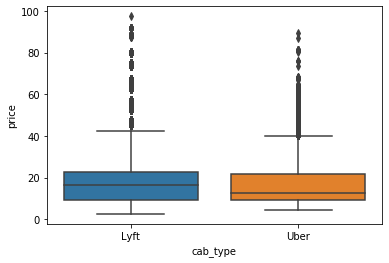

In [6]:
ax = sns.boxplot(x="cab_type", y="price", data=car_rides)

In [7]:
x_vars = car_rides.drop(['cab_type_le', 'product_id_le',
                         'product_id', 'cab_type', 'destination', 'source', 'price', 'name'], axis = 1)
x_vars = x_vars.apply(pd.to_numeric)
x_vars.head(3)

target = car_rides[['price']]
target = target.apply(pd.to_numeric) 

In [8]:
#Build Random Forest model
rf_clf = RandomForestRegressor(n_estimators = 10,
                               criterion = 'mse',
                               max_depth = None,
                               min_samples_split = 2,
                               min_samples_leaf = 1,
                               max_features = 'auto', 
                               random_state = 0
                              )
# Split dataset into training and testing datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_vars, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)
# Fit the model
rf_clf_model = rf_clf.fit(x_train, y_train)

C:\Users\roger\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [9]:
rf_train_pre = rf_clf_model.predict(x_train)
rf_test_pre = rf_clf_model.predict(x_test)

In [10]:
rf_clf_model.score(x_train, y_train)

0.9890189913708114

In [11]:
rf_clf_model.score(x_test, y_test)

0.9692076447020764

### Feature Importance

Text(0.5, 0, 'Relative Importance: Gini')

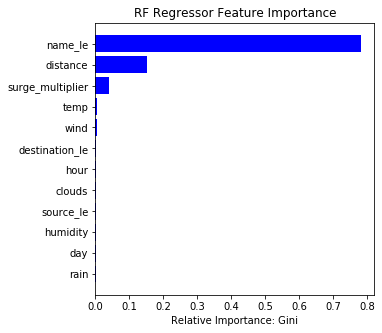

In [12]:
rf_clf_feat_names = x_train.columns

rf_clf_importances = rf_clf.feature_importances_

from matplotlib.pyplot import figure
figure(num=None, figsize = (5,5))

indices = np.argsort(rf_clf_importances)

plt.figure(1)
plt.title('RF Regressor Feature Importance')
plt.barh(range(len(indices)), rf_clf_importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), rf_clf_feat_names[indices])
plt.xlabel('Relative Importance: Gini')

## Lyft

### Random Forest

In [13]:
Lyft = car_rides[car_rides['cab_type'].isin(['Lyft'])]
Lyft['name'].value_counts()

Lyft            93886
Shared          93762
Lux             93562
Lux Black       93533
Lyft XL         93387
Lux Black XL    92988
Name: name, dtype: int64

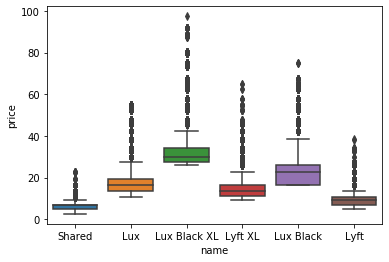

In [14]:
ax = sns.boxplot(x="name", y="price", data=Lyft)

In [15]:
sample_df = np.random.permutation(len(Lyft))
Lyft_sample = Lyft.take(sample_df[:1000])

Text(0.5, 1, 'Distance vs. Price in Lyft')

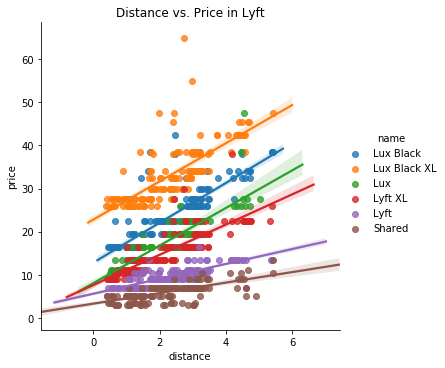

In [16]:
sns.lmplot('distance', 'price', data=Lyft_sample, hue="name")
plt.title('Distance vs. Price in Lyft')

In [17]:
x_vars = Lyft.drop(['cab_type_le', 'product_id', 'product_id_le',
                    'cab_type', 'destination', 'source', 'price', 'name'], axis = 1)
x_vars = x_vars.apply(pd.to_numeric)
x_vars.head(3)

target = Lyft[['price']]
target = target.apply(pd.to_numeric) 

In [18]:
rf_clf = RandomForestRegressor(n_estimators = 10,
                               criterion = 'mse',
                               max_depth = None,
                               min_samples_split = 2,
                               min_samples_leaf = 1,
                               max_features = 'auto', #sqrt,log2
                               random_state = 0
                              )

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_vars, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [19]:
rf_clf_model = rf_clf.fit(x_train, y_train)

C:\Users\roger\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [20]:
rf_train_pre = rf_clf_model.predict(x_train)
rf_test_pre = rf_clf_model.predict(x_test)

In [21]:
rf_clf_model.score(x_train, y_train)

0.9967837542254933

In [22]:
rf_clf_model.score(x_test, y_test)

0.9854976243897676

### Feature Importance

Text(0.5, 0, 'Relative Importance: Gini')

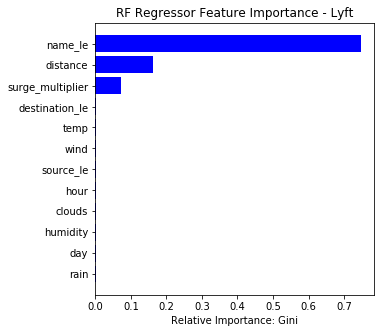

In [23]:
rf_clf_feat_names = x_train.columns

rf_clf_importances = rf_clf.feature_importances_

from matplotlib.pyplot import figure
figure(num=None, figsize = (5,5))

indices = np.argsort(rf_clf_importances)

plt.figure(1)
plt.title('RF Regressor Feature Importance - Lyft')
plt.barh(range(len(indices)), rf_clf_importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), rf_clf_feat_names[indices])
plt.xlabel('Relative Importance: Gini')

## Uber

### Random Forest

In [24]:
Uber = car_rides[car_rides['cab_type'].isin(['Uber'])]

In [25]:
Uber['name'].value_counts()

Black        101102
UberXL       100859
Black SUV    100795
WAV          100615
UberPool     100402
UberX        100105
Name: name, dtype: int64

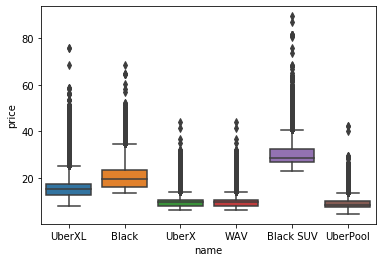

In [26]:
ax = sns.boxplot(x="name", y="price", data=Uber)

In [27]:
sample_df = np.random.permutation(len(Uber))
Uber_sample = Uber.take(sample_df[:1000])

Text(0.5, 1, 'Distance vs. Price in Uber')

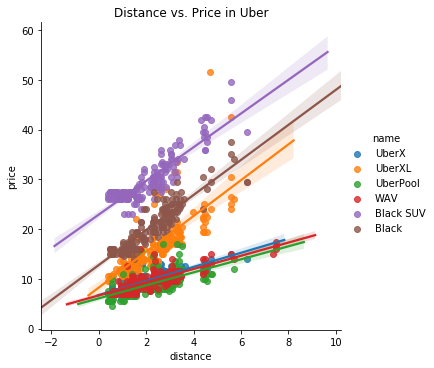

In [28]:
sns.lmplot('distance', 'price', data=Uber_sample, hue="name")
plt.title('Distance vs. Price in Uber')

In [29]:
#Uber = car_rides[car_rides['name'].isin(['Black'])]

In [30]:
x_vars = Uber.drop(['cab_type_le', 'product_id', 'product_id_le', 
                    'cab_type', 'destination', 'source', 'price', 'name'], axis = 1)
x_vars = x_vars.apply(pd.to_numeric)
x_vars.head(3)

target = Uber[['price']]
target = target.apply(pd.to_numeric) 

In [31]:
rf_clf = RandomForestRegressor(n_estimators = 10,
                               criterion = 'mse',
                               max_depth = None,
                               min_samples_split = 2,
                               min_samples_leaf = 1,
                               max_features = 'auto', #sqrt,log2
                               random_state = 0
                              )

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_vars, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [32]:
rf_clf_model = rf_clf.fit(x_train, y_train)

C:\Users\roger\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [33]:
rf_train_pre = rf_clf_model.predict(x_train)
rf_test_pre = rf_clf_model.predict(x_test)

In [34]:
rf_clf_model.score(x_train, y_train)

0.9791963816572278

In [35]:
rf_clf_model.score(x_test, y_test)

0.946433659584454

### Feature Importance

Text(0.5, 0, 'Relative Importance: Gini')

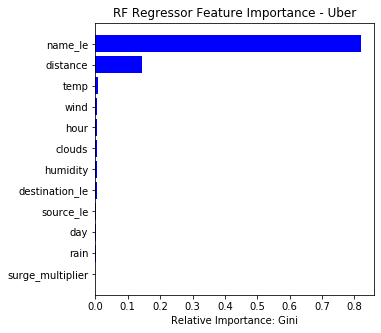

In [36]:
rf_clf_feat_names = x_train.columns

rf_clf_importances = rf_clf.feature_importances_

from matplotlib.pyplot import figure
figure(num=None, figsize = (5,5))

indices = np.argsort(rf_clf_importances)

plt.figure(1)
plt.title('RF Regressor Feature Importance - Uber')
plt.barh(range(len(indices)), rf_clf_importances[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), rf_clf_feat_names[indices])
plt.xlabel('Relative Importance: Gini')